In [1]:
import cv2
from IPython.core.display import Math
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageTk
%matplotlib inline

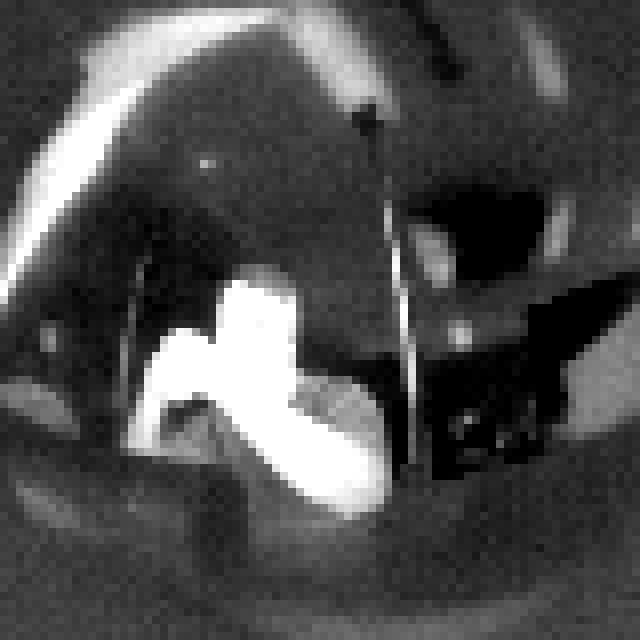

In [2]:
ir = f"../OUT/TEST/out_img.png"
img_arr = cv2.imread(ir, 0)
# img_arr = np.resize(img_arr, (80,80))
img = Image.fromarray(img_arr)

display(img)

total_value: 31832000 
total_pixel: 409600


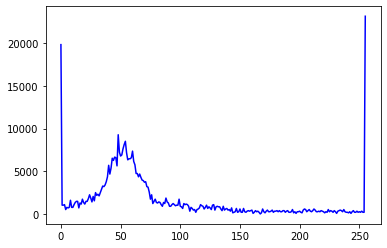

In [3]:
def arr_2_histArr(img_arr):
    total_pixel = 0
    total_value = 0
    hist_arr = np.zeros((np.max(img_arr)+1), dtype=int)
    for row in img_arr:
        for value in row:
            hist_arr[value] += 1
            total_pixel += 1
            total_value += value
    return hist_arr, total_value, total_pixel


fig = plt.figure()
hist_arr, total_value, total_pixel = arr_2_histArr(img_arr)
print(f"total_value: {total_value} {chr(10)}total_pixel: {total_pixel}")
# plt.bar(range(len(hist_arr)), hist_arr, color='blue')
plt.plot(hist_arr, color='blue')
plt.show()

In [4]:
norm_hist = hist_arr/total_pixel
norm_hist[-8:]

array([0.00078125, 0.00046875, 0.000625  , 0.00046875, 0.00078125,
       0.00046875, 0.00046875, 0.0565625 ])

[385088 385280 385536 385728 386048 386240 386432 409600]
(256,)


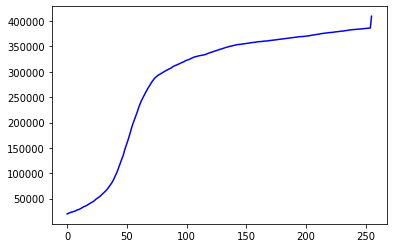

In [11]:
def flatArr_2_cumHistArr(arr):
    cum = 0
    cum_sum = np.zeros(len(arr), dtype=int)
    for idx, val in enumerate(hist_arr):
        cum += val
        cum_sum[idx] += cum
    return cum_sum

cum_sum = flatArr_2_cumHistArr(hist_arr)
print(cum_sum[-8:])
print(cum_sum.shape)
# plt.bar(range(len(cum_hist_arr)), cum_hist_arr, color='blue')
plt.plot(cum_sum, color='blue')
plt.show()


In [8]:
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

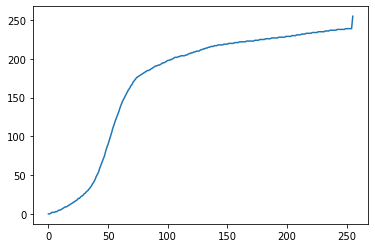

In [19]:
# re-normalize the cdf
nj = (cum_sum-cum_sum.min())*255
N = cum_sum.max()-cum_sum.min()
cs = nj/N
cs = cs.astype('uint8')
plt.plot(cs)

In [14]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[hist_arr]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

IndexError: index 19840 is out of bounds for axis 0 with size 256

In [18]:
LUT = np.round(cum_sum).astype(np.uint8)
LUT

array([128, 128, 128, 192, 192, 192, 128, 128, 192, 192, 192,   0,  64,
         0, 192, 128, 128,   0, 192,   0, 128,  64,   0,   0, 192,   0,
       128, 128, 128,  64, 192, 192,   0, 192,   0, 192,  64, 128,  64,
        64, 128, 192, 192,  64, 192, 192, 128, 128, 192,   0, 128, 128,
        64,   0,  64,  64,   0,  64, 128,  64,   0,   0, 128,   0, 128,
       128, 192, 128,   0,  64, 192, 128,   0,  64,  64,   0, 192, 128,
        64,   0,  64,  64, 192,   0,  64, 192,   0, 192,   0, 128, 128,
         0, 128, 192, 128, 192, 128, 128, 128,  64, 192,   0, 128,  64,
       128,   0,  64, 192,   0,   0, 128,  64,  64,   0,   0,  64,   0,
        64,   0, 128, 192, 192, 192,  64, 128,  64,  64,  64, 128,  64,
       128,   0,  64, 128, 192,  64, 192, 128, 192,  64,   0,   0,  64,
         0, 128,  64,  64, 192, 128, 128, 192, 128,  64, 192, 192, 128,
       192,  64, 128,   0, 192,   0, 192,  64,  64, 128,  64,  64, 192,
         0,   0, 128, 192, 128, 128, 128, 192, 128,  64, 128, 19

In [ ]:
new_hist_arr = LUT[cum_hist_arr]
hist_img = np.reshape(new_hist_arr, (img_arr.shape))
h_img = Image.fromarray(hist_img, 'L')
display(h_img)

In [150]:
# img_list = list(img_arr.flatten())
img_arr_1D = np.reshape(img_arr, (img_arr.shape[0]*img_arr.shape[1]))
# img_arr_1D.shape
# img_list[:9]
# img_arr_1D

In [151]:
eq_img_arr = np.zeros((img_arr_1D.shape[0]))
# eq_img_list1 = [LUT[p] for p in img_arr_1D]
# eq_img_list1[-9:]
for i, j in enumerate(img_arr_1D):
    eq_img_arr[i] = LUT[j]
eq_img_arr[-8:]


array([128., 128., 128., 128., 128., 128., 128., 128.])

In [152]:
eq_img_arr1 = np.reshape(eq_img_arr, (img_arr.shape))
eq_img_arr1.shape

(640, 640)

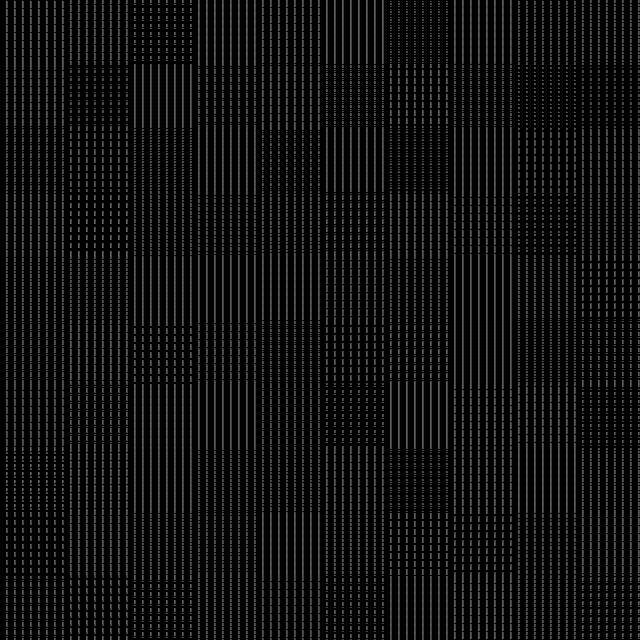

In [153]:
a = Image.fromarray(eq_img_arr1, 'L')
display(a)

KeyboardInterrupt: 

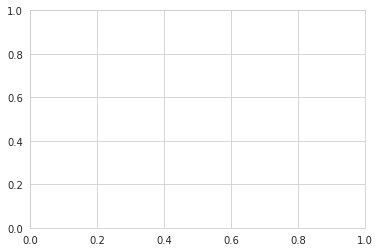

In [105]:
# transform pixel values to equalize
eq_img_list = [LUT[p] for p in img_list]
ll = np.array(eq_img_list)
#convert NumPy array to pillow Image and write to file
# eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
# eq_img = Image.fromarray(eq_img_array, mode='L')
plt.bar(range(len(ll)), ll, color='blue')
# plt.plot(range(len(ll)), ll, color='blue')
plt.show()

In [36]:
hist *= 255
hist[:9]

array([12.3515625 ,  0.6375    ,  0.6375    ,  0.67734375,  0.31875   ,
        0.478125  ,  0.43828125,  0.478125  ,  0.99609375])

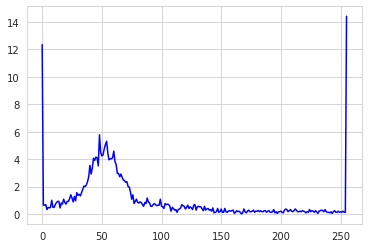

In [37]:
plt.plot(range(len(hist)), hist, color='blue')
plt.show()

In [41]:
hist_arr[:9]

array([19840,  1024,  1024,  1088,   512,   768,   704,   768,  1600])

In [55]:

# normalized cumulative histogram
# chistogram_array = np.cumsum(hist_arr)
# chistogram_array[-3:]

In [65]:
# len(eq_img_list)

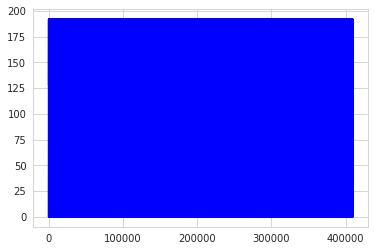

In [62]:
"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255*cum_hist_arr).astype(np.uint8)

"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img_arr.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_arr.shape)

plt.plot(range(len(eq_img_list)), eq_img_list, color='blue')
plt.show()

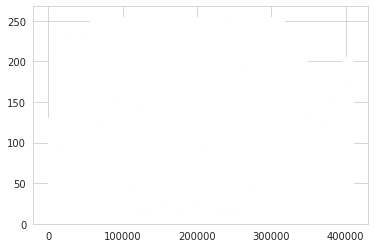

In [77]:
# img_filename = 'input_image.jpg'
# save_filename = 'output_image.jpg'
# img = Image.open(img_filename).convert(mode='L')
# img_array = np.asarray(imgray)
img_array = img_arr
"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255*chistogram_array).astype(np.uint8)

"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]
ll = np.array(eq_img_list)
#convert NumPy array to pillow Image and write to file
# eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
# eq_img = Image.fromarray(eq_img_array, mode='L')
plt.bar(range(len(ll)), ll, color='blue')
# plt.plot(range(len(ll)), ll, color='blue')
plt.show()

In [74]:
#create list of values 0-255
# pixels = []
# for x in range(256):
#     pixels.append(x)
pixels = hist_arr.tolist()

#set width and height of image
width, height = img_arr.size
size = width*height
counts = []

#for each intensity level
for i in pixels:
    temp = 0
    #traverse through the pixels
    for x in range(width):
        for y in range(height):
            #if pixel intensity is equal to intensity level increment counter
            if (img.getpixel((x, y)) == i):
                temp = temp+1
    #append frequency of intensity level
    counts.append(temp)

#initialize list for frequency probabilities
pdf = []
for i in counts:
    pdf.append(i/size)

#initialize list for cumulative probability
cdf = []
total = 0
for i in pdf:
    total = total+i
    cdf.append(total)

#intialize list for mapping cdf
tr = []
for i in cdf:
    t = round(i*255)
    tr.append(t)

#initialize list containing new frequencies for equalized hist
hs = []
for i in pixels:
    count = 0
    tot = 0
    for j in tr:
        if (j == i):
            tot = tot+counts[count]
        count = count+1
    hs.append(tot)

#plot equalized histogram
plt.bar(pixels, hs)
# plt.plot(hs)
plt.show()

TypeError: cannot unpack non-iterable int object

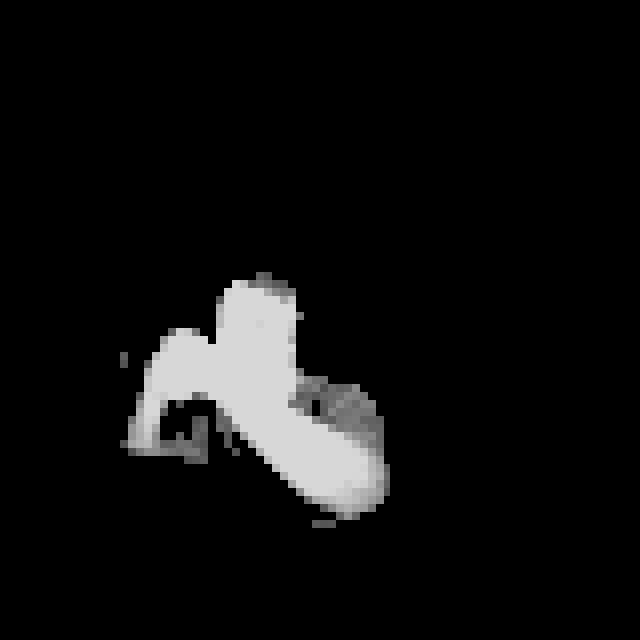

In [5]:
thresh = 120
img_arr = np.array(img)
# img_arr
img_arr[img_arr < thresh] = 0
img_arr[img_arr > thresh] -= 40
img_arr[:270] = 0
img_arr[550:] = 0
img_arr[:,:120] = 0
img_arr[:,390:] = 0
img_arr[img_arr < 0] = 0

# img_arr

arr2img = Image.fromarray(img_arr)
arr2img

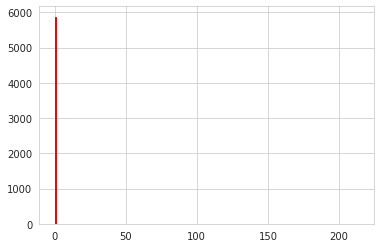

In [6]:
resized_image = cv2.resize(img_arr, (80,80))
histogramer(resized_image)

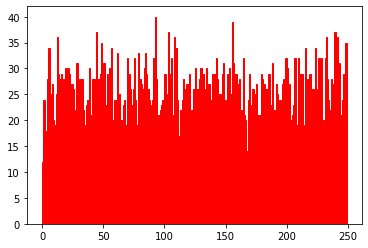

In [100]:
a = np.random.rand(80,80)
a = a*250
a = np.around(a, 0).astype(int)
# a[a > 253] = 50

# a
histogramer(a)